In [7]:
!pip3 install sklearn
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install yfinance

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.6 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 12.1 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.6 MB 6.1 MB/s eta 0:00:01
  

In [8]:
import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
import yfinance as yf
import numpy as np
%matplotlib inline

/Users/ethanhuang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [53]:
data = yf.download('^GSPC', period = '5y', interval = '1d')

[*********************100%%**********************]  1 of 1 completed


In [23]:
escorts_data = yf.download('ESCORTS.NS',period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [50]:
print(len(escorts_data))
escorts_data.head()

1236


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-02  770.000000  776.000000  760.000000  772.349976  759.331177   
2019-04-03  774.099976  788.950012  765.000000  767.700012  754.759583   
2019-04-04  772.000000  774.250000  762.150024  771.049988  758.053040   
2019-04-05  773.849976  780.049988  766.150024  768.900024  755.939392   
2019-04-08  769.000000  774.000000  752.200012  760.650024  747.828430   

             Volume  
Date                 
2019-04-02  2528629  
2019-04-03  1651147  
2019-04-04  1059948  
2019-04-05   965651  
2019-04-08  1270995

In [54]:
#sp_hist.plot.line(y= "Close", use_index=True)
print(len(data))
data.head()


1258


Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-03  2876.090088  2885.250000  2865.169922  2873.399902  2873.399902   
2019-04-04  2873.989990  2881.280029  2867.139893  2879.389893  2879.389893   
2019-04-05  2884.159912  2893.239990  2882.989990  2892.739990  2892.739990   
2019-04-08  2888.459961  2895.949951  2880.780029  2895.770020  2895.770020   
2019-04-09  2886.580078  2886.879883  2873.330078  2878.199951  2878.199951   

                Volume  
Date                    
2019-04-03  3570000000  
2019-04-04  3038740000  
2019-04-05  3155970000  
2019-04-08  3056460000  
2019-04-09  3032480000

In [55]:
data_target = data.iloc[:1200,4]
data_test = data.iloc[1201:,4]
steps=7

data = sp_data.loc[:,["Adj Close"]].values
test = data[len(data) - len(data_test) - steps:]

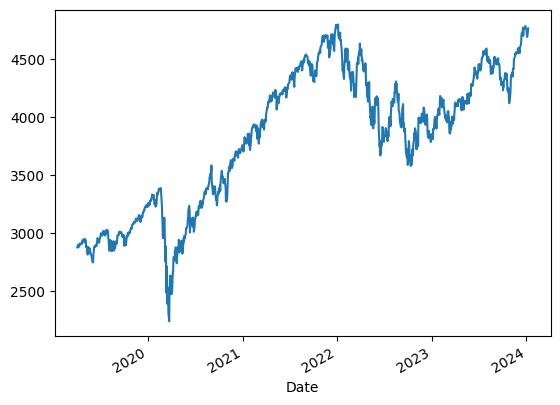

In [56]:
plot = data_target.plot()

In [52]:
def scaledata(data_target):
    #Import scaler and initialise it
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    #transform by converting it to array and shape of (-1,1)
    data_target_scaled = scaler.fit_transform(np.array(data_target).reshape(-1,1))
    #plot the scaled version of data
    plot_scaled = pd.DataFrame(data_target_scaled).plot()
    print(data_target.shape)
    #returns scaled data
    return data_target_scaled, scaler

In [57]:
def createPatternSet(data_target_scaled,steps=7):   
    x_patern = []  #Independent Variable
    y_price = []   #Dependent Variable
    for day in range(steps,data_target_scaled.shape[0]):
        row = data_target_scaled[day-steps:day,0]
        #print(len(row))
        x_patern.append(row)
        y = data_target_scaled[day,0]
        #print(y)
        y_price.append(y)
    
    x_patern,y_price = np.array(x_patern),np.array(y_price)
    #RNN and LSTM takes 3D inputs, we need to change the shape of array to 3 dimensional.
    x_patern = x_patern.reshape(x_patern.shape[0],x_patern.shape[1],1)
    #returns independent and dependent variable sets
    return x_patern,y_price

(1200,)
(1200,)


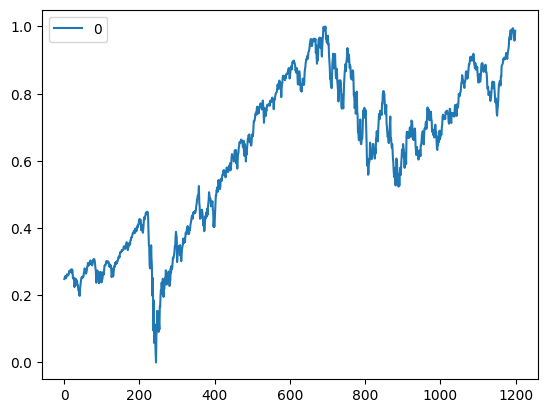

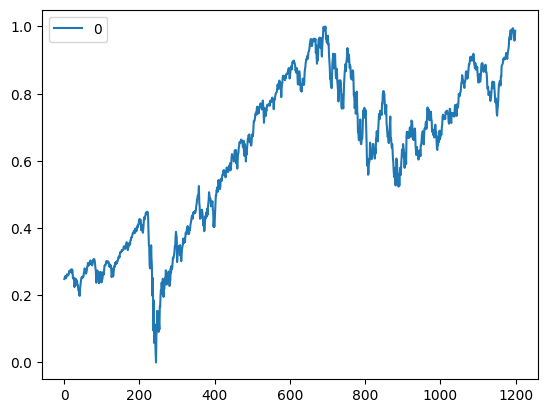

In [60]:
#Scale Down Target
data_target_scaled = scaledata(data_target)[0]
scaler = scaledata(data_target)[1]
#prepare test data
test = data[len(data) - len(data_test) - steps:]
test = scaler.transform(test)